In [1]:
import pandas as pd
import numpy as np


import pandas_datareader as pdr 
from datetime import datetime 

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# İmport all function from "porfolio_management" modul
from portfolio_functions import *

# Portfolio Management Modul
### Functions
* **get_stock**
* **creat_portfolio**
* **plot_pf_price**
* **return_portf**
* **portf_vol**
* **creat_random_portf**
* **markowitz_portfolio**

In [6]:
# Get stock codes from BIST100 Stcoks list
bist=pd.read_csv("bist100_list")
stock_list=bist.loc[[1,3,13,25,34,41,65,86,95,98],"yahoo_code"]

### get_stock

In [7]:
# Get a stock from Yahoo Finance (get_stock)
sisecam = get_stock("SISE.IS",[2020,1,1],[2021,5,10])
sisecam.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,5.36,5.27,5.29,5.33,62036079.0,5.180484
2020-01-03,5.36,5.17,5.30,5.27,62950188.0,5.122168
2020-01-06,5.28,5.10,5.24,5.12,65070398.0,4.976375
2020-01-07,5.19,5.10,5.18,5.12,39917326.0,4.976375
2020-01-08,5.14,4.96,5.00,5.09,54799214.0,4.947217


## creat_portfolio

In [8]:
# Creat Portfolio (creat_portfolio)
s_list=[ "AAPL","MSFT","XOM","JNJ","JPM","AMZN", "GE", "FB","T" ]
portfolio=creat_portfolio(s_list,[2016,12,30],[2017,12,31])

In [9]:
portfolio.head()

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
Date,,,,,,,,,
2016-12-30,27.335484,58.126839,71.507912,102.873978,76.175270,749.869995,28.304560,115.050003,32.531433
2017-01-03,27.413372,58.538418,72.007042,103.436539,77.005066,753.669983,28.385174,116.860001,32.906250
2017-01-04,27.382690,58.276497,71.214783,103.266876,77.147110,757.179993,28.394133,118.690002,32.715012
2017-01-05,27.521944,58.276497,70.153183,104.347321,76.436966,780.450012,28.232903,120.669998,32.623222
2017-01-06,27.828764,58.781628,70.113564,103.847282,76.445862,795.989990,28.313520,123.410004,31.973240


## plot_pf_price

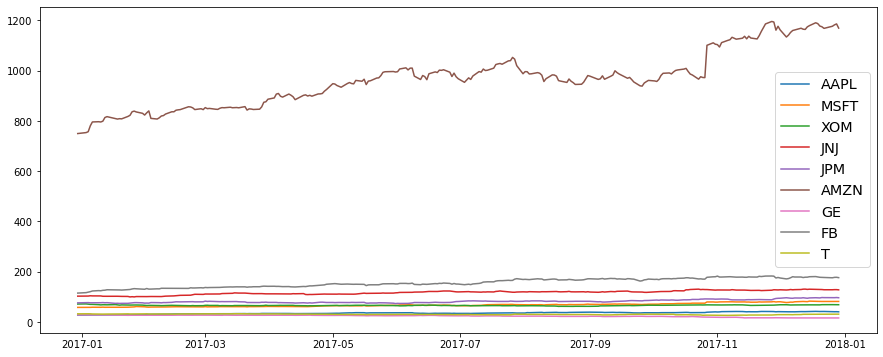

In [10]:
# Plot Portfolio adj close price
plot_pf_price(portfolio)

## return_portf

In [11]:
# Calculate the portfolio return with desired wegihts
# Creat a weight set
weight=np.random.random(9)
weight /= np.sum(weight)
#Calculate portfolio  daily return
return_portf(portfolio, weight)

Date
2016-12-30    0.000000
2017-01-03    0.006981
2017-01-04   -0.000418
2017-01-05    0.002702
2017-01-06    0.005891
                ...   
2017-12-22   -0.001314
2017-12-26   -0.002089
2017-12-27    0.001594
2017-12-28    0.001931
2017-12-29   -0.005696
Length: 252, dtype: float64

<AxesSubplot:xlabel='Date'>

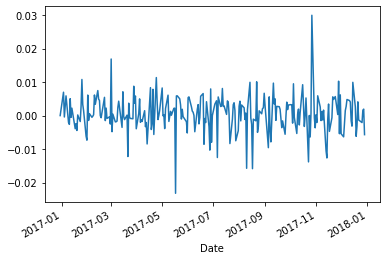

In [12]:
# Plot the portfolio daily return
return_portf(portfolio,weight).plot()

## portf_vol

In [13]:
# Calculate the Portfolio Volatility( Standart Deviation) (port_vol)
portf_vol(portfolio,weight,252)

0.08600856981799922

## creat_random_portf

In [14]:
# Creat random portfolio wegiht sets
creat_random_portf(portfolio)

,AAPL_weight,MSFT_weight,XOM_weight,JNJ_weight,JPM_weight,AMZN_weight,GE_weight,FB_weight,T_weight
0,0.097087,0.177636,0.112904,0.059163,0.191285,0.079390,0.007179,0.177171,0.098183
1,0.183124,0.056909,0.057048,0.149359,0.102533,0.176192,0.048606,0.056571,0.169657
2,0.022655,0.006165,0.174930,0.119812,0.149121,0.062641,0.098989,0.170085,0.195603
3,0.173928,0.014366,0.153299,0.150164,0.117516,0.144276,0.013818,0.075139,0.157493
4,0.118804,0.154776,0.189816,0.033437,0.097616,0.121859,0.094131,0.046297,0.143264
...,...,...,...,...,...,...,...,...,...
4995,0.073028,0.066439,0.029545,0.152262,0.117702,0.133620,0.179548,0.123662,0.124193
4996,0.031830,0.006541,0.115208,0.064855,0.293926,0.044586,0.248681,0.059181,0.135192
4997,0.043342,0.120728,0.047333,0.169794,0.144797,0.068064,0.133010,0.164528,0.108404
4998,0.118326,0.047744,0.202528,0.006321,0.116394,0.123098,0.119259,0.195734,0.070595


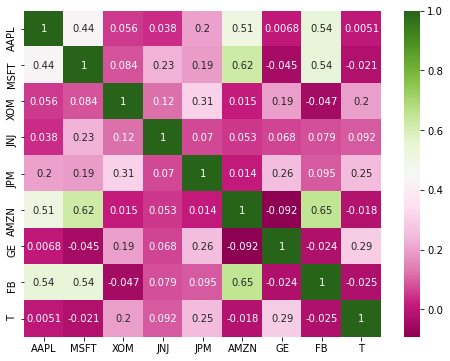

In [30]:
corr_mat(portfolio)

## markowitz_portfolio

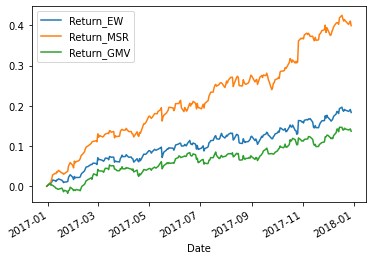

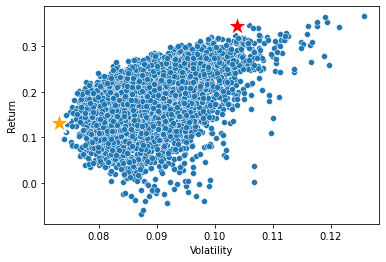

In [15]:
# Prepare a random portfolio sets and calculate return, volatility and sharp ratio and sign max sharp ratio point and min volatility point
rand_porf,ws=markowitz_portfolio(portfolio,risk_free=0,size=5000,plot=True)


### An Examlpe with BORSAISTANBUL Stocks

In [19]:
# An Examlpe with BORSAISTANBUL Stocks
# Get Stock code
bist=pd.read_csv("bist100_list")
stock_list=bist.loc[[1,3,13,25,34,41,65,86,95,98],"yahoo_code"]

In [20]:
stock_list

1     AKBNK.IS
3     AKSEN.IS
13    BIMAS.IS
25     DOAS.IS
34    ETILR.IS
41    GUBRF.IS
65    KOZAL.IS
86     SISE.IS
95    THYAO.IS
98    TOASO.IS
Name: yahoo_code, dtype: object

In [21]:
portfolio_bist=creat_portfolio(stock_list,[2019,12,31],[2020,12,31])
portfolio_bist.head()

,AKBNK.IS,AKSEN.IS,BIMAS.IS,DOAS.IS,ETILR.IS,GUBRF.IS,KOZAL.IS,SISE.IS,THYAO.IS,TOASO.IS
Date,,,,,,,,,,
2019-12-31,7.918423,3.81,44.621418,8.163636,2.40,9.06,74.250000,5.161046,14.46,21.361843
2020-01-02,7.976934,3.88,44.182835,8.197937,2.50,9.21,76.500000,5.180484,14.83,21.172102
2020-01-03,7.762395,3.78,45.193489,7.803475,2.38,8.82,76.349998,5.122168,14.27,20.903299
2020-01-06,7.518601,3.63,45.460453,7.503341,2.30,8.36,79.750000,4.976375,13.57,20.681932
2020-01-07,7.596615,3.70,45.803699,7.614820,2.45,8.59,79.949997,4.976375,13.54,21.013981


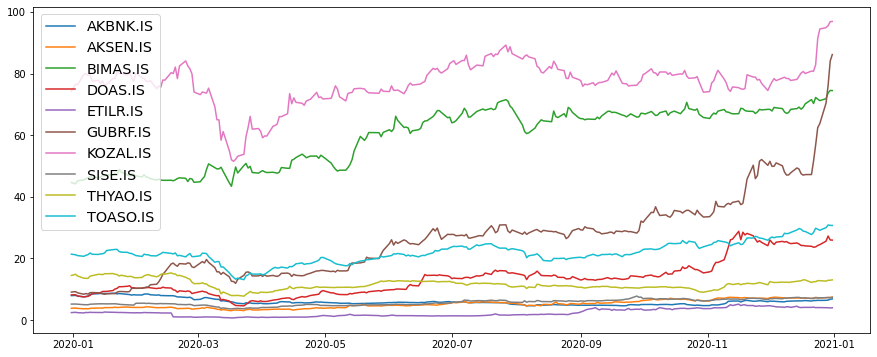

In [22]:
plot_pf_price(portfolio_bist)

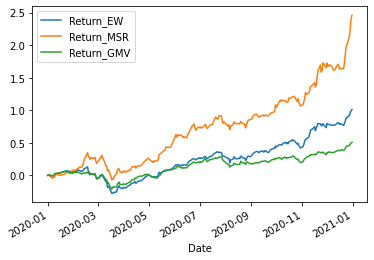

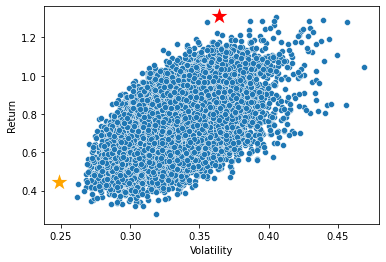

In [24]:
rand_portf,opt_wegihts=markowitz_portfolio(portfolio_bist,risk_free=0.12,size=20000,plot=True)

In [26]:
opt_wegihts

,AKBNK.IS,AKSEN.IS,BIMAS.IS,DOAS.IS,ETILR.IS,GUBRF.IS,KOZAL.IS,SISE.IS,THYAO.IS,TOASO.IS,Return,Volatility,Sharpe
msr_w,0.055074,0.021684,0.190054,0.036643,0.079668,0.389795,0.017143,0.123511,0.037391,0.049036,1.310294,0.363902,3.270919
gmv_w,0.116797,0.044681,0.352800,0.013322,0.016050,0.008911,0.168031,0.161322,0.053250,0.064835,0.442727,0.248830,1.296980
e_w,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.750974,0.319554,1.974544


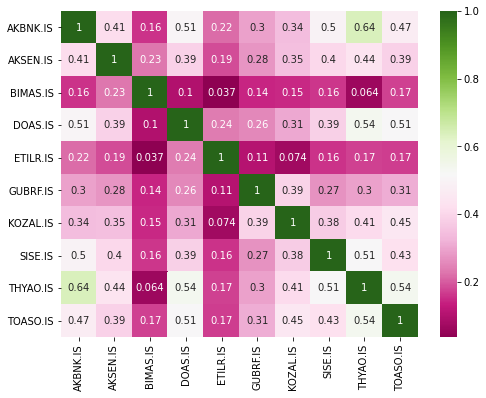

In [28]:
corr_mat(portfolio_bist)